In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [163]:
import sys
sys.path.append("../")

import westworld
from westworld.assets.sprites.utils import *
from westworld.assets import make_arrow
from westworld.colors import *
from westworld.environment import GridEnvironment
from westworld.agents.sir_agent import SIRAgent
from westworld.environment.spatial import SpatialEnvironment
from westworld.agents import BaseAgent
from westworld.objects import BaseLayer
from westworld.agents.collectible_finder import CollectibleFinderAgent
from westworld.objects import BaseObstacle,BaseTrigger,BaseCollectible,BaseRectangle
from westworld.simulation import Simulation
from westworld.colors import *
from westworld.logger import Logger

# Vis with 3js

In [166]:

class Player(BaseAgent):
    def step(self):
        self.wander()
        
        

spawner1 = lambda x,y : Player(x,y,color = RED)
spawner2 = lambda x,y : Player(x,y,color = BLUE)

agent = spawner1(5,20)

env = GridEnvironment(width = 20,height = 10,cell_size=30,show_grid = True,objects = [agent,layer])
# env.spawn(spawner1,2)
# env.spawn(spawner2,2)

5 20


5 20


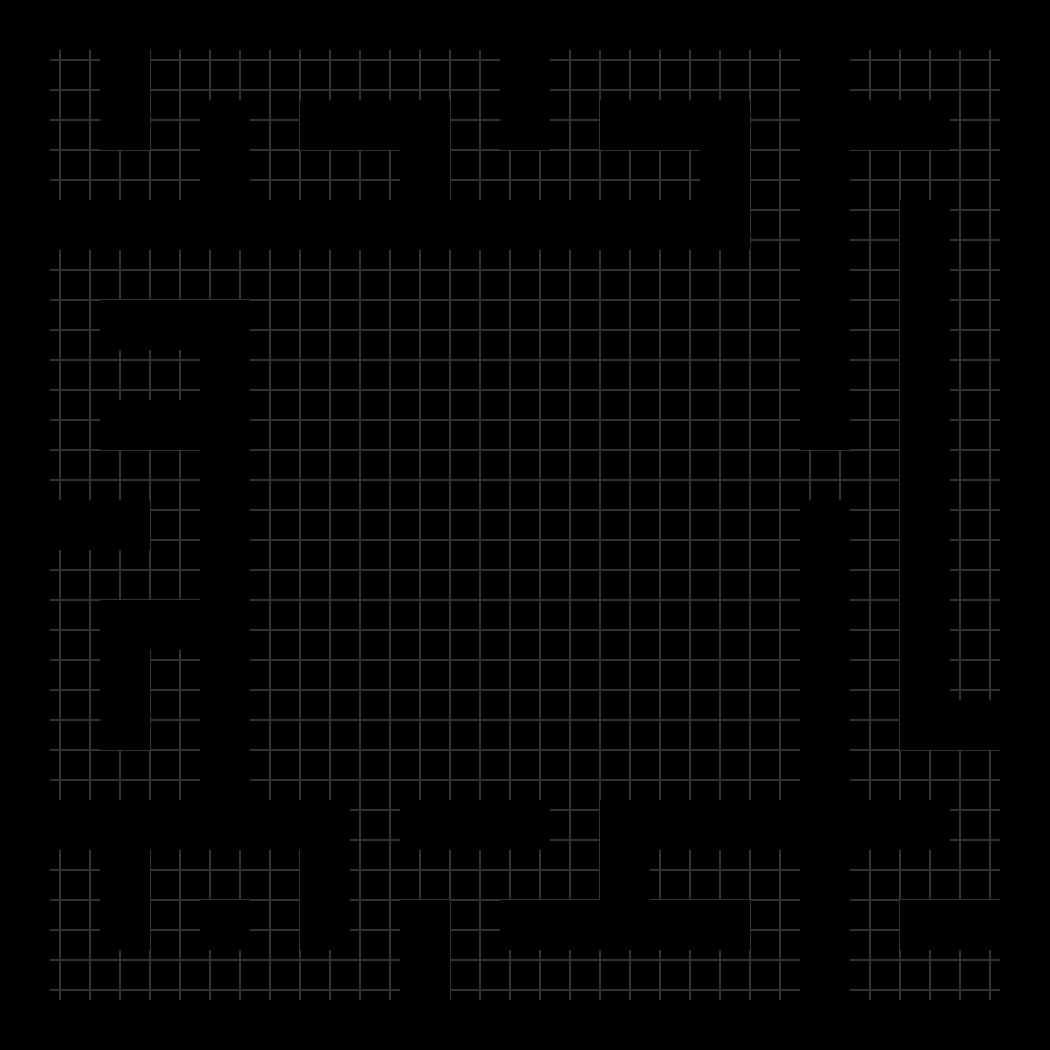

In [167]:
env.render()
env.get_img()

In [119]:

class Player(BaseAgent):
    def step(self):
        self.wander()
        
        

spawner1 = lambda x,y : Player(x,y,color = RED)
spawner2 = lambda x,y : Player(x,y,color = BLUE)

agent = spawner1(5,20)

env = GridEnvironment(width = 20,height = 10,cell_size=30,show_grid = True,objects = [agent])
# env.spawn(spawner1,2)
# env.spawn(spawner2,2)

5 -11


5 -11


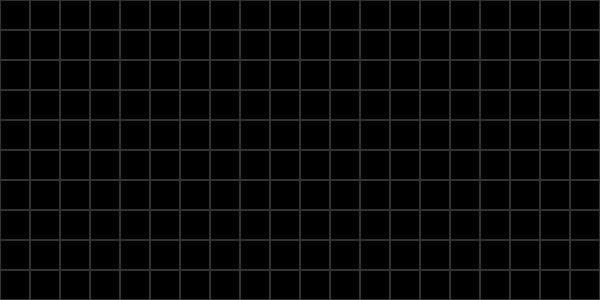

In [120]:
env.render()
env.get_img()

In [13]:
sim = Simulation(env,fps = 10)
sim.run_episode(n_steps = 100)

# NavAgent

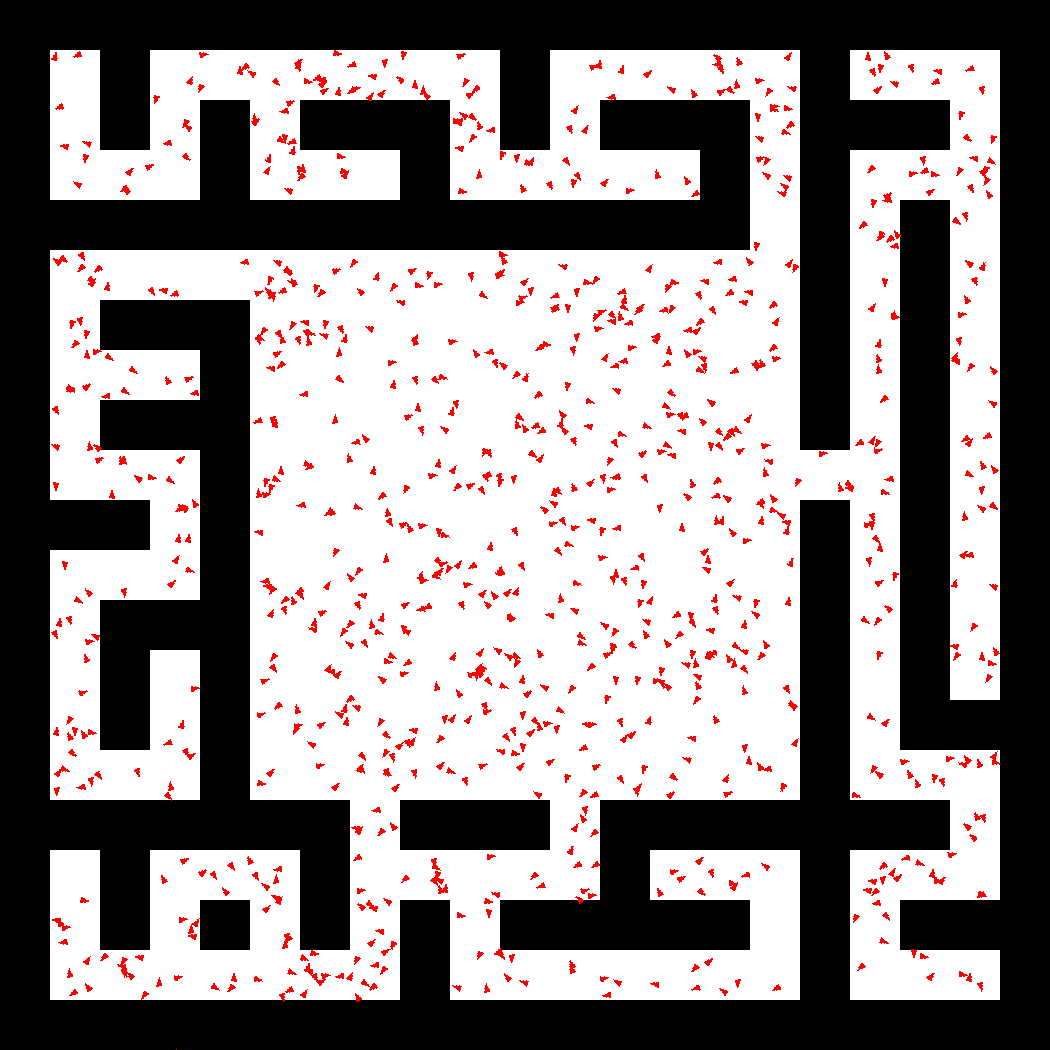

In [174]:

# Prepare layer
layer = BaseLayer(img_filepath = "GeneratedMaze_cellsize=50.png",img_transparency = (255,255,255))



class Agent(BaseAgent):
    
    @property
    def blocking(self):
        return False
    
    def when_blocked(self,collisions):
        self.set_direction()
    
    
    def step(self):
        self.wander()
#         self.angle += 1
#         self.move(speed = 2)

spawner = lambda x,y : Agent(x,y,width = 10,height = 10,img_asset = "arrow",img_rotate = True,)
        
env = SpatialEnvironment(objects = [layer],background_color = WHITE)
env.spawn(spawner,1000)
env.render()
env.get_img()

In [175]:
sim = Simulation(env,fps = 25)
sim.run_episode(n_steps = 1000,save = True)

[INFO] Saving video at ./captures/Simulation_1593083583.mp4

